In [35]:
#In this code, I will be trying to improve the Random Forest accuracy score that I got without any feature engineering or model optimization.
#The accuracy score to beat is 0.915.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
df = pd.read_csv('cleaned_wine_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [38]:
X = df.drop(['quality'], axis=1)
Y = df['quality']

In [39]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

def modelaccuracy(model):
    model.fit(X_train, Y_train)
    result = accuracy_score(Y_test, (model.predict(X_test)))
    print(f'Model Accuracy is {result}')

In [40]:
#Accuracy of the model without any transformation.

rfr = RandomForestClassifier(random_state=42)

modelaccuracy(rfr)

Model Accuracy is 0.9154411764705882


In [41]:
#Using Grid Search Cross Validation, the model's accuracy decreased slightly.

gcv_rfr = {'max_depth':[5, 10, 15, 20], 'n_estimators':[100, 150, 200, 250, 300, 350, 400], 'min_samples_leaf':[1,2], 'min_samples_split':[2,5]}

grid_rfr = GridSearchCV(rfr, gcv_rfr)

modelaccuracy(grid_rfr)

Model Accuracy is 0.9044117647058824


In [42]:
#I now used Random Forest to find important features.

important = rfr.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)


In [43]:
from sklearn.inspection import permutation_importance

column = df.drop(['quality'], axis=1)

result = permutation_importance(rfr, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=column.columns)


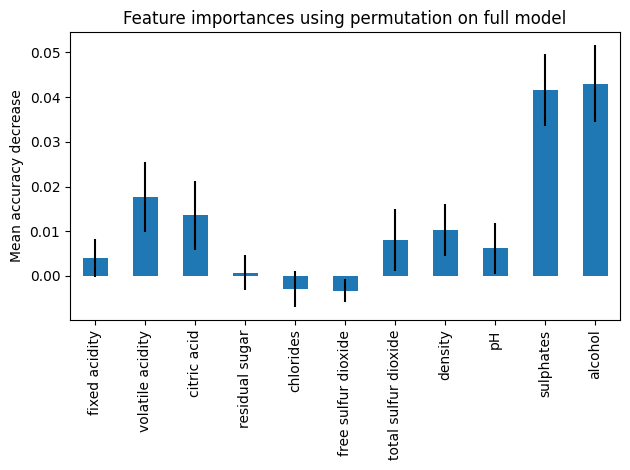

In [44]:
#Feature Importance.

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [45]:
X_new = df[['volatile acidity','citric acid','sulphates','alcohol']]
Y_new = df['quality']

X_new = scaler.fit_transform(X_idk)

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, random_state=42, test_size=0.2)

In [46]:
#With only important features, the accuracy of our model was still less than the original model.

new_rfr = RandomForestClassifier(random_state=42)

modelaccuracy(new_rfr)

Model Accuracy is 0.9007352941176471


In [47]:
#Combining the GSCV and only selecting important features, the model's accuracy score increased by ~0.011.

gcv_rfr = {'max_depth':[5, 10, 15, 20], 'n_estimators':[100, 150, 200, 250, 300, 350, 400], 'min_samples_leaf':[1,2], 'min_samples_split':[2,5]}

new_grid_rfr = GridSearchCV(new_rfr, gcv_rfr)

modelaccuracy(new_grid_rfr)

Model Accuracy is 0.9264705882352942
